In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Teeth DataSet/Teeth_Dataset/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    'Teeth DataSet/Teeth_Dataset/Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'Teeth DataSet/Teeth_Dataset/Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False 
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1508 images belonging to 10 classes.


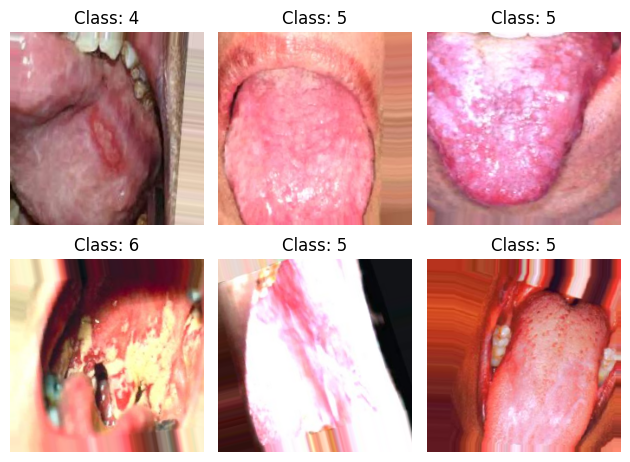

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_batch, y_batch = next(train_generator)
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"Class: {np.argmax(y_batch[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


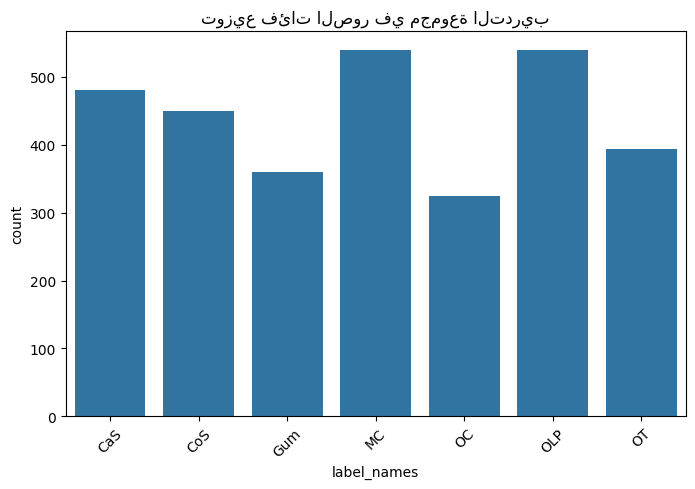

In [3]:
import seaborn as sns
import pandas as pd

labels_count = train_generator.classes
labels_map = train_generator.class_indices
inv_map = {v: k for k, v in labels_map.items()}

df = pd.DataFrame({'labels': labels_count})
df['label_names'] = df['labels'].map(inv_map)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label_names')
plt.title("توزيع فئات الصور في مجموعة التدريب")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15
97/97 [==============================] - 524s 5s/step - loss: 1.3195 - accuracy: 0.4995 - val_loss: 1.1314 - val_accuracy: 0.6021
Epoch 2/15
97/97 [==============================] - 535s 6s/step - loss: 1.2858 - accuracy: 0.5173 - val_loss: 1.0324 - val_accuracy: 0.6663
Epoch 3/15
97/97 [==============================] - 535s 5s/step - loss: 1.2323 - accuracy: 0.5254 - val_loss: 1.0951 - val_accuracy: 0.6206
Epoch 4/15
97/97 [==============================] - 412s 4s/step - loss: 1.1837 - accuracy: 0.5497 - val_loss: 0.9136 - val_accuracy: 0.6936
Epoch 5/15
97/97 [==============================] - 515s 5s/step - loss: 1.2090 - accuracy: 0.5526 - val_loss: 0.9351 - val_accuracy: 0.6907
Epoch 6/15
97/97 [==============================] - 564s 6s/step - loss: 1.1558 - accuracy: 0.5779 - val_loss: 0.8789 - val_accuracy: 0.6984
Epoch 7/15
97/97 [==============================] - 565s 6s/step - loss: 1.1463 - accuracy: 0.5769 - val_loss: 0.9554 - val_accuracy: 0.7072
Epoch 8/15
17

NameError: name 'history' is not defined

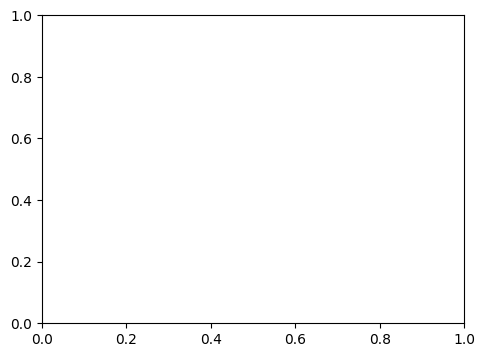

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('دقة النموذج')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('خسارة النموذج')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")

In [ ]:
model.save("teeth_classifier_model.h5")